# Spectral form factor

Ref for equations: PHYSICAL REVIEW X 12, 011018 (2022)

SFF is the Fourier transform of the two point energy desnity
$$ K(t) \equiv \frac{1}{D^2} \overline{\sum_{i, j} e^{i\left(E_i-E_j\right) t}}=\frac{1}{D^2} \overline{\operatorname{Tr}[T(t)] \operatorname{Tr}\left[T^{\dagger}(t)\right]}
$$

D is the Hilbert space dimension. $\{E_i\}$ is the energy eigenstate.


In [49]:
#import usual libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import sparse
from numpy import linalg as LA
from scipy import linalg as sLA
from scipy.sparse.linalg import eigs
from IPython.display import display, Latex
from decimal import *
import pandas as pd
import math
from qiskit.visualization import plot_histogram
from qiskit.visualization import *
from qiskit.circuit.library import iSwapGate
from scipy.linalg import expm,eig
from scipy.stats import unitary_group
from IPython.core.interactiveshell import InteractiveShell
from utils_operators import *
from utils_observables import *
#from bristol.ensembles import Circular
from itertools import cycle
from functools import reduce
import sys
from scipy.io import mmread
from qiskit.visualization import array_to_latex

mycolor=cycle('krcbm')
mymarker=cycle('oxs^v')

InteractiveShell.ast_node_interactivity = "all"
getcontext().prec = 30


# Main Body of the code

In [50]:
N=4
read_H_from_file=0


nq=N//2
mmax=2**nq
Jsqr=1

delt=1
nstep=20
totalT=delt*nstep
mytimes1=np.exp( np.arange(0,totalT+delt/2,delt) )

# Read SYK Hamiltonian from file

In [15]:
if read_H_from_file:
    Harr=[]
    idstart=1
    idend=10
    totalid=idend-idstart+1
    for instance_id in range(idstart,idend+1):
        syk_op = mmread("N%d_configs/H_N%d_%d.mtx" %(N,N,instance_id))
        Harr.append(syk_op)

In [51]:
Harr=[]
totalid=10
J_squared=1.0
Harr =SYK_Hamiltonian(make_Majorana(N), N, totalid, J_squared)

In [17]:
len(Harr)

10

# SFF Definition 1


Text(0, 0.5, '$ O(t) $')

Text(0.5, 0, '$t$')

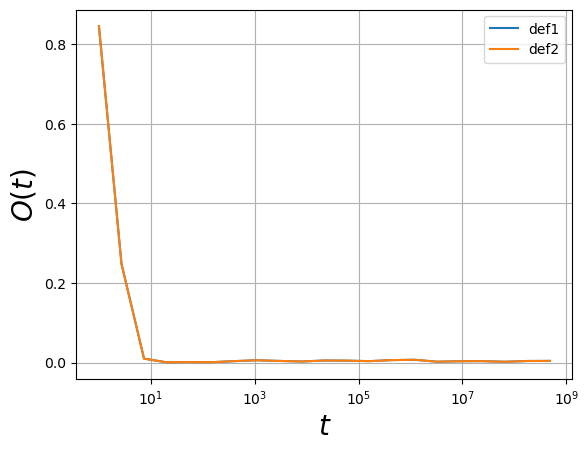

In [18]:

SFF=np.zeros(len(mytimes1))+0.0j


SFF=sff_zerobeta(Harr,mytimes1)
SFF2=sff_zerobeta_def2(Harr,mytimes1)

plt.plot(mytimes1,SFF,label='def1')
plt.plot(mytimes1,SFF2,label='def2')

plt.legend(loc='best',frameon=False,fontsize=20)
plt.xscale('log')
plt.ylabel(r'$ O(t) $',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.grid()
plt.legend()
#plt.savefig(r'spectral_form_factor.png',bbox_inches='tight')
plt.show()
plt.close()
    

# SFF with inverse temperature $\beta$

Ref paper: Blcak holes and random matrices : Masanori, Polchinski 

If there is temperature involved,
$$g(t ; \beta) \equiv \frac{\left\langle Z(\beta, t) Z^*(\beta, t)\right\rangle_J}{\langle Z(\beta)\rangle_J^2}$$

************ I think the definitino in the paper and plots are not consistent, should be

If there is temperature involved,
$$g(t ; \beta) \equiv \frac{\left\langle Z(\beta, t) Z^*(\beta, t)\right\rangle_J}{\langle Z(\beta)^2\rangle_J}$$

where, 
$$Z(\beta,t)=\mathrm{Tr}(\exp(-\beta H -i H t))$$

Note: $$ \left\langle Z(\beta, 0) Z^*(\beta, 0)\right\rangle=\left\langle Z(\beta) Z(\beta)\right\rangle   $$

$\langle \cdots \rangle_J$ denotes the disorder average.


0
10
20
30
40
50
60
70
80


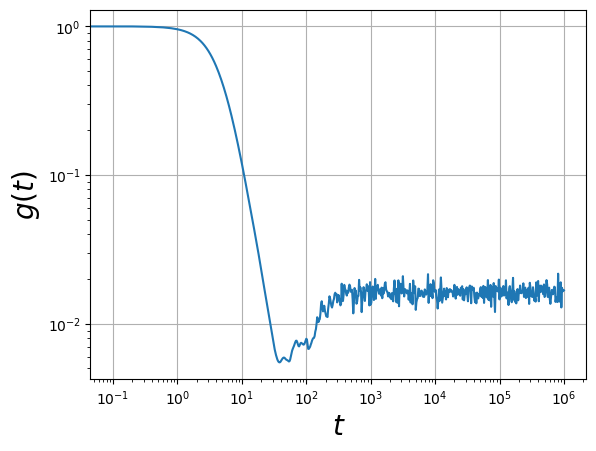

CPU times: user 4h 4min 26s, sys: 2min 1s, total: 4h 6min 27s
Wall time: 7h 12min 52s


In [52]:
%%time

N=16
delt=0.01
nstep=600
mybeta=5.0
J_squared=1.0
totalT=delt*nstep
mytimes1=np.concatenate( (np.arange(0,1,0.1),10**( np.arange(0,totalT+delt/2,delt) )  ) )
totalid=90

SFF=np.zeros(len(mytimes1))
#norm_factor=np.zeros(totalid)
np.random.seed(seed=213423)

majorana_list=make_Majorana(N)

for i in range(totalid):
    if i%10==0:
        print(i)
    myH=single_SYK_Hamiltonian(majorana_list, N, J_squared) 
    #norm_factor[i]=np.real(np.trace(expm(-mybeta*myH) )**2 ) # this is Z(beta)   
    
    for ind in range(len(mytimes1)):
        SFF[ind]=SFF[ind]+np.real(compute_sff_instance_beta(myH,mytimes1[ind],mybeta) )
        
SFF=SFF/SFF[0] #taking disorder avg
    
    
    

    
plt.plot(mytimes1,SFF)
#plt.legend(loc='best',frameon=False,fontsize=20)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$ g(t) $',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.grid()
#plt.savefig(r'spectral_form_factor.png',bbox_inches='tight')
plt.show()
plt.close()

Text(0, 0.5, '$ g(t) $')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '$N$=16, $\\beta$=5.0, $N_M$=90')

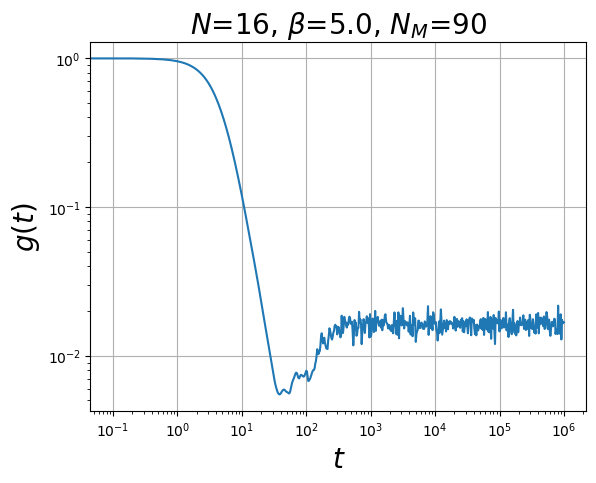

In [53]:
plt.plot(mytimes1,SFF)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$ g(t) $',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.grid()
plt.title(r'$N$=%d, $\beta$=%0.1f, $N_M$=%d' %(N,mybeta,totalid),fontsize=20)
plt.savefig(r'spectral_form_factor_N%d_beta%0.1f.png'%(N,mybeta),bbox_inches='tight')
plt.show()
plt.close()

In [8]:

N=4
Harr=[]
np.random.seed(seed=213423)
for i in range(10):
    Harr.append(single_SYK_Hamiltonian(make_Majorana(N), N, J_squared) )
    

Harr2=SYK_Hamiltonian(make_Majorana(N),N,10,J_squared)

np.allclose(Harr,Harr2)

True